## A 4k MMR Dota 2 Player and Data Scientist's Predictive Model

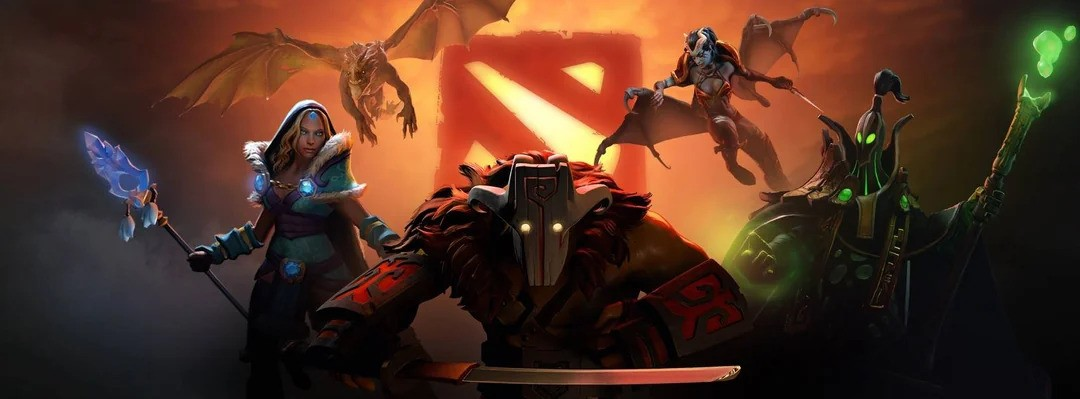

This is the notebook of a 4k MMR DotA 2 player's approach to predicting whether the Radiant or Dire side will win the game. As a longtime fan of Dota with over 1.5k hours in the mid lane maining Shadow Fiend, Invoker, and Pudge, I was pleasantly surprised by mlcourse.ai's new Kaggle Competition. This notebook serves as an introduction to both the game of Dota 2 and binary classification.

### Libraries

We'll begin by loading in an assortment of libraries to help us on the data science end-to-end pipeline.

In [ ]:
import ujson as json

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split # to split
from sklearn.model_selection import TimeSeriesSplit # to split
from sklearn.metrics import roc_curve # ROC curve
from sklearn.metrics import roc_auc_score # ROC score
from sklearn.model_selection import cross_val_score # cross validation score
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer
from sklearn.preprocessing import StandardScaler # standartization
from sklearn.preprocessing import MinMaxScaler # standartization
from sklearn.model_selection import GridSearchCV # to find best parameters
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.ensemble import BaggingClassifier # bagging
from sklearn.ensemble import VotingClassifier # ensemble models (voting and mean)
from sklearn.metrics import confusion_matrix # Confusion Matrix
from sklearn.svm import SVC # SVM
from sklearn.svm import LinearSVC # SVM
from sklearn.pipeline import make_pipeline # pipeline
from catboost import CatBoostClassifier, Pool # Yandex Gradient Boosting
import xgboost as xgb # Gradient Boosting
from mlxtend.classifier import StackingClassifier # stacking
from mlxtend.classifier import StackingCVClassifier # stacking
import lightgbm as lgb # Microsoft Gradien Boosting
import matplotlib.pyplot as plt # to plot
plt.style.use('ggplot')
import seaborn as sns # to plot
import numpy as np # to count
import pandas as pd # DataFrames
from scipy import stats # stats
import pickle # reading pckle files
from IPython.display import display # Display tables
import time # time checking
import re # regex
import eli5 # feature importance
from collections import Counter # to count
pd.set_option('display.max_columns', None) # to display max columns in DataFrames
pd.options.mode.chained_assignment = None  # turn off mistakes

Additionally, we'll add in some **helper** functions for writing our results to the submission file.

In [ ]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [ ]:
train = pd.read_csv('/kaggle/input/mlcourse-dota2-win-prediction/train_features.csv', index_col='match_id_hash')
target = pd.read_csv('/kaggle/input/mlcourse-dota2-win-prediction/train_targets.csv', index_col='match_id_hash')
test = pd.read_csv('/kaggle/input/mlcourse-dota2-win-prediction/test_features.csv', index_col='match_id_hash')

### Understanding the Data



In [ ]:
train.head()

In [ ]:
train.describe()

In [ ]:
target['radiant_win'].value_counts()